In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

In [2]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

# 7 Reconstruction of the incoming Eν for the selected events
Aug 30, 2017

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/EvReconstruction/'

# pairs of tracks at close proximity

In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic()
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

28843 pairs from MC-BNB + cosmic DATA overlay
18998 pairs in FV
5099 are 1mu-1p, 26.8%
4347 are other pairs, 22.9%
9552 are cosmic, 50.3%
--------------------------------------------------------------
2008 are CC 1p 0pi, 10.6%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.8%,100.0%,10.6%,no cut,100.0% (5099),100.0% (4347),100.0% (9552),100.0% (2008)
PIDa,88.1%,52.2%,86.3%,20.2%,${PID}_a>12$,88.1% (4491),58.0% (2520),16.6% (1587),86.3% (1733)
flashes,87.7%,54.8%,86.0%,21.2%,$N_{flashes}>0$,87.7% (4473),57.8% (2512),12.3% (1173),86.0% (1727)
flash,82.9%,57.0%,80.8%,21.9%,optical filter,82.9% (4225),55.8% (2424),8.0% (761),80.8% (1622)
length,68.6%,66.6%,70.7%,27.0%,$l_{\mu}>l_{p}$,68.6% (3498),30.8% (1337),4.4% (418),70.7% (1420)
non-collinearity,63.2%,71.6%,68.0%,30.3%,"$|\theta_{1,2}-90^0|<60^0$",63.2% (3222),23.8% (1035),2.6% (244),68.0% (1365)
vertex activity,43.1%,75.2%,59.3%,40.7%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",43.1% (2196),13.8% (600),1.3% (125),59.3% (1190)
delta phi,30.1%,88.4%,52.2%,60.4%,$|\Delta \phi - \pi|<40^0$,30.1% (1535),3.7% (162),0.4% (40),52.2% (1049)
Pt no Delta phi,32.4%,83.3%,52.8%,53.4%,$p_{t}<0.35$ GeV/c,32.4% (1653),6.3% (276),0.6% (55),52.8% (1060)
soft Pt,26.2%,91.5%,47.7%,65.7%,$p_{t}<0.35$ GeV/c,26.2% (1335),2.3% (100),0.3% (24),47.7% (958)


## 7.I Calorimetric reconstruction of the incoming neutrino energy

23.8 % with ratio< 8 %
23.8 % with ratio< 8 %
32.0 % with ratio< 8 %
32.0 % with ratio< 8 %
37.8 % with ratio< 8 %
37.8 % with ratio< 8 %
57.4 % with ratio< 8 %
57.4 % with ratio< 8 %


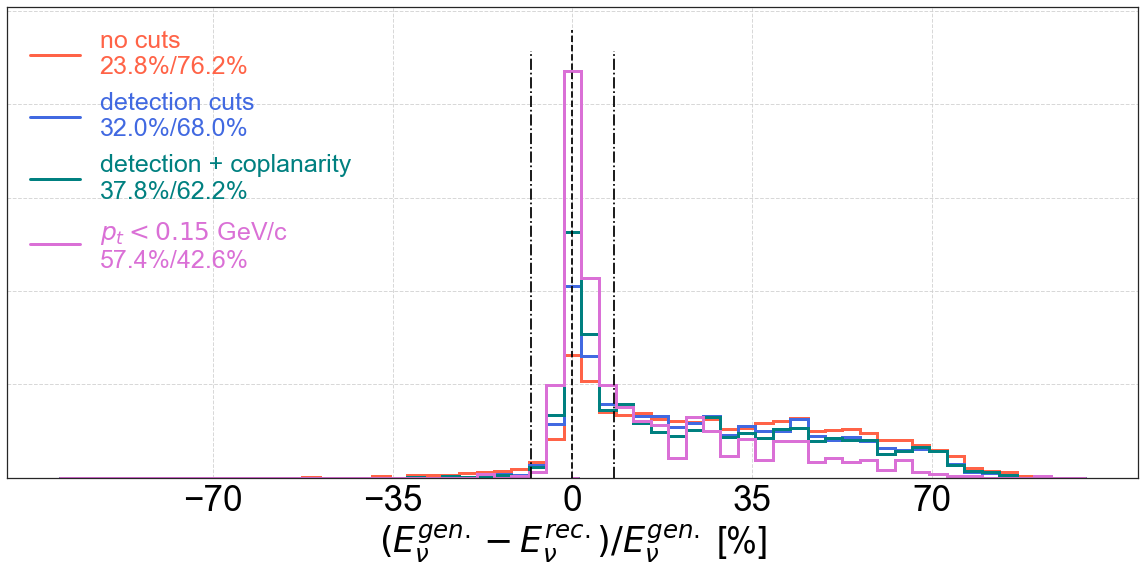

In [5]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['no cuts','detection cuts','detection + coplanarity', '$p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    fgood = find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage )
    
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,linewidth=3
             ,label=label+'\n'+'%.1f'%(100.*fgood)+'%'+'/%.1f'%(100.*(1-fgood))+'%')
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35
         ,do_add_grid=True,do_add_legend=False)
# colored legend
leg = plt.legend(fontsize=25,loc='upper left')
for text,color in zip(leg.get_texts(),cut_colors): text.set_color(color)
    
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

## 7.III Reconstructed pt

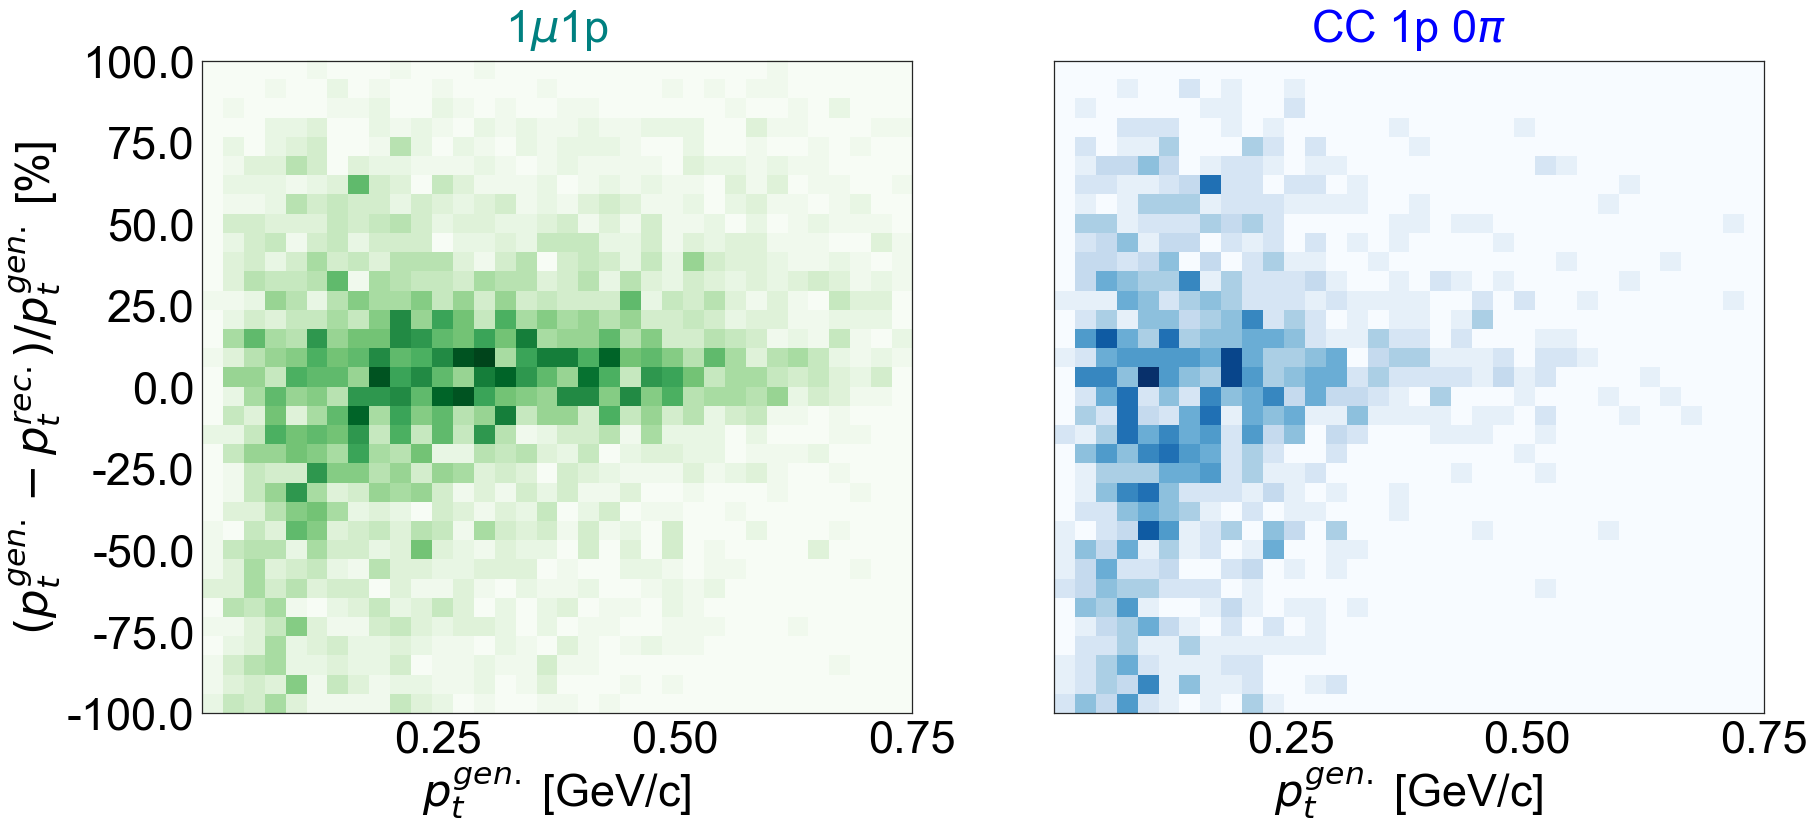

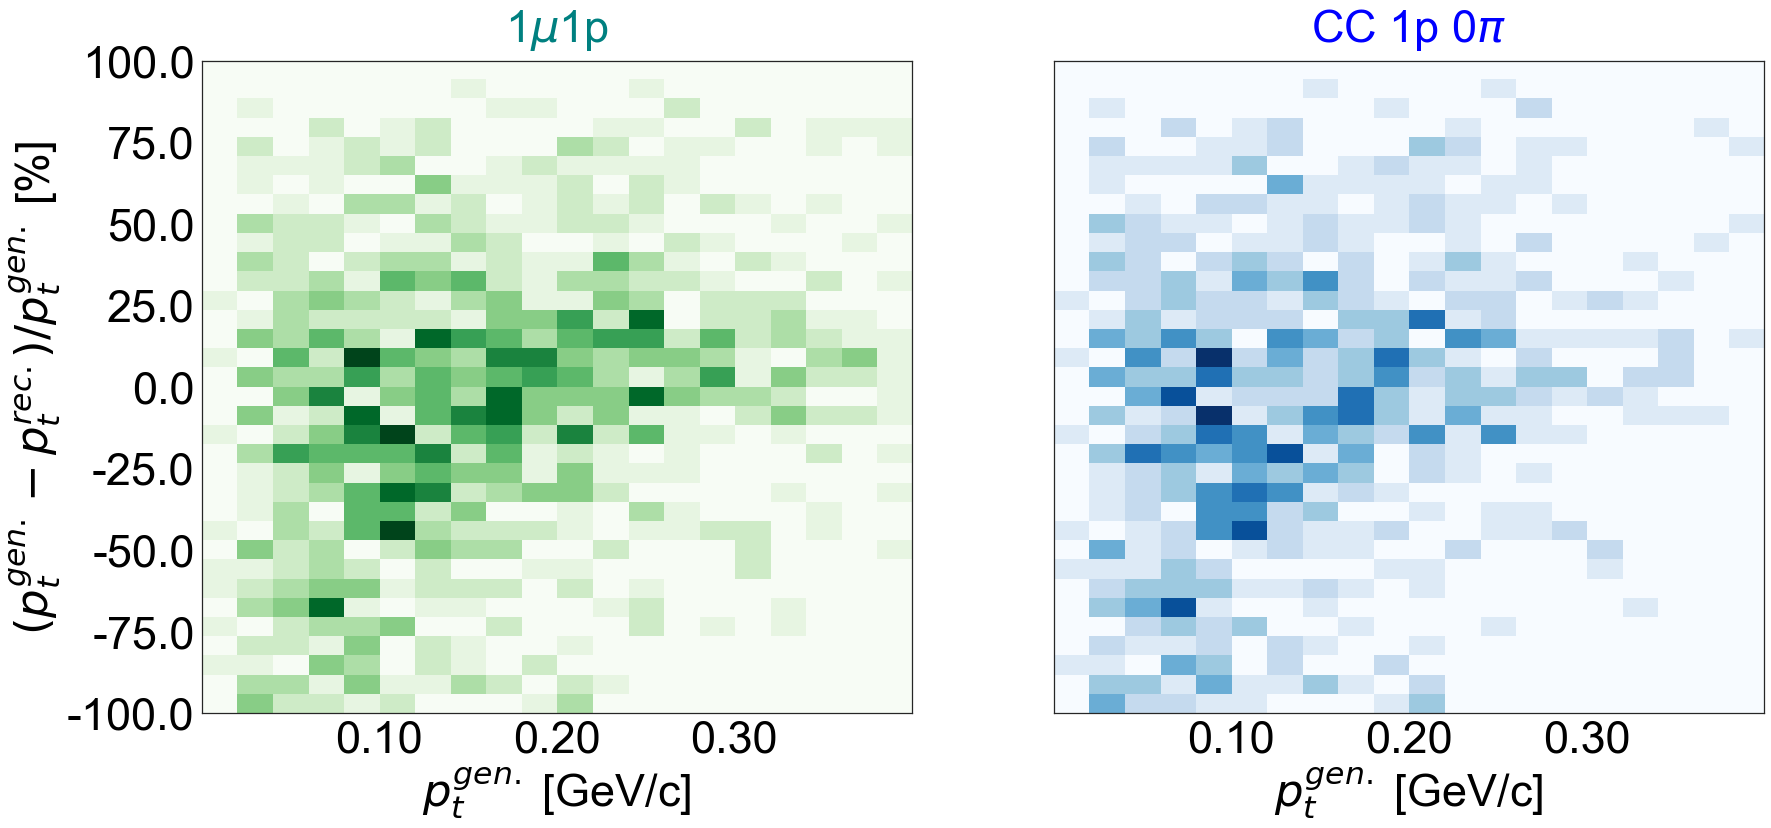

In [6]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,0.75,35),np.linspace(-100,100,35))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.25,0.5,0.75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'Pt_reconstruction.pdf')

bins=(np.linspace(0,0.4,21),np.linspace(-100,100,35))
fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.1,0.2,0.3])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'Pt_reconstruction_after_cut_DeltaPhi.pdf')

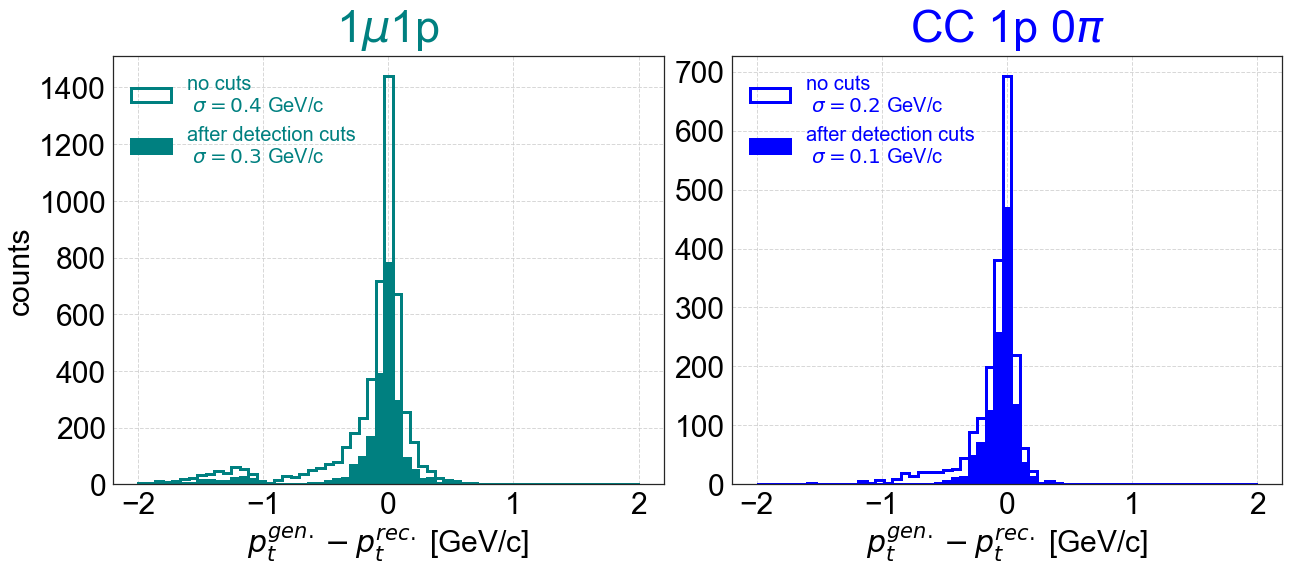

In [7]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type,label,cmap,color = get_pair_hpars(index)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after detection cuts']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
        delta = sample['truth_Pt']-sample['reco_Pt']
        small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<2]
        delta_small_sample = small_sample['truth_Pt']-small_sample['reco_Pt']
        sigma = np.std(delta_small_sample)
        h,bins,_=ax.hist(delta,bins=np.linspace(-2,2,60)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+' GeV/c')                
        set_axes(ax,r'$p_t^{gen.}-p_t^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-2,-1,0,1,2]
                )    
        leg = plt.legend(fontsize=20,loc='upper left')
        for text in leg.get_texts():
            text.set_color(color)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco.pdf')

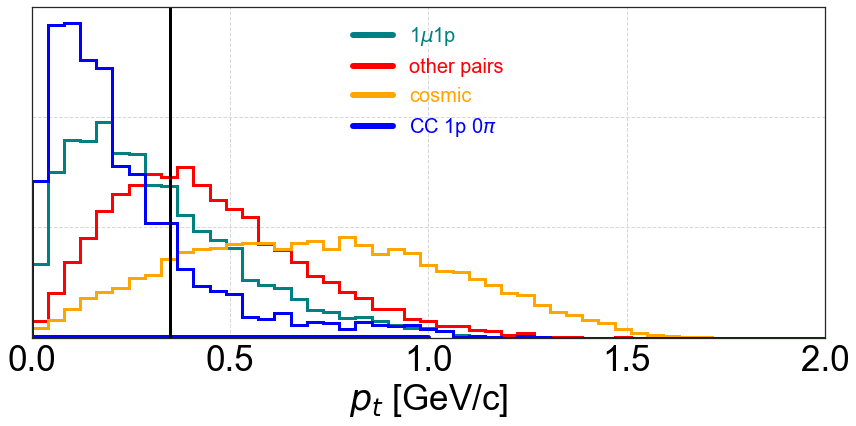

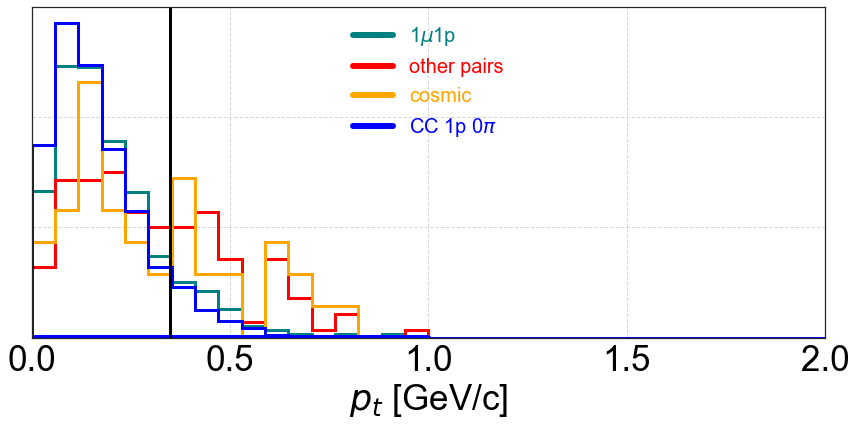

In [8]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig(figures_path+'Pt.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='delta phi',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,35)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_cut_DeltaPhi.pdf')

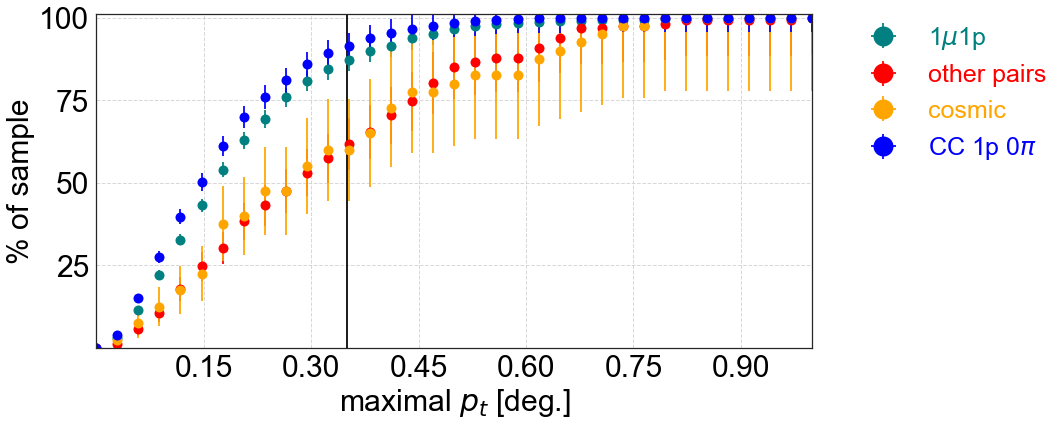

In [9]:
ax,leg=plot_cut_samples(reduced_cut_name='delta phi',do_add_legend=True,legend_fontsize=25,markers_size=10               
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1. , Nbins=35,fontsize=30,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_xticks([0.15,0.3,0.45,0.6,0.75,0.9])
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### E$\nu$ in bins of $p_t$ 

In [10]:

bins_labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
bins_colors = ['tomato','royalblue','teal']



44.8 % with ratio< 8 %
22.6 % with ratio< 8 %
14.6 % with ratio< 8 %


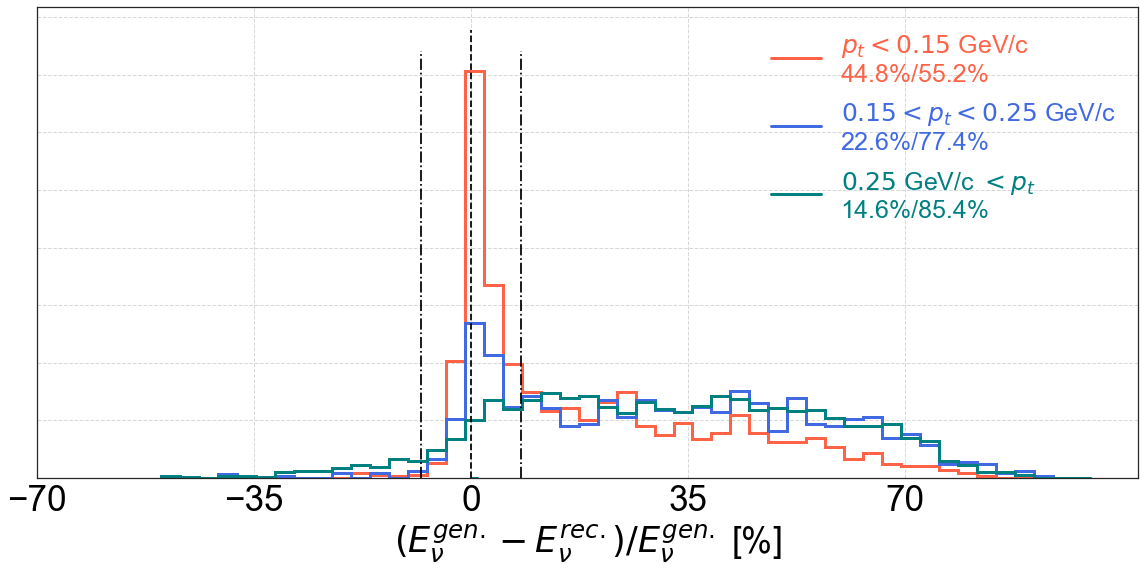

In [11]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCbnbDATAcosmicSamples['no cut']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' \n'+text,linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper right')
for text,color in zip(leg.get_texts(),bins_colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

57.4 % with ratio< 8 %
30.4 % with ratio< 8 %
13.6 % with ratio< 8 %


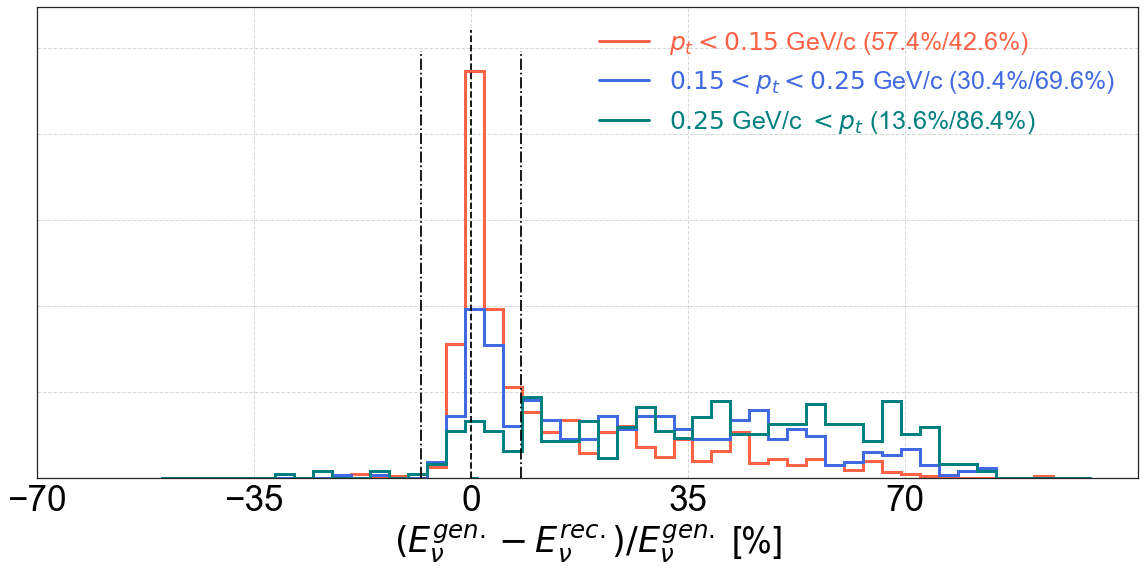

In [12]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCbnbDATAcosmicSamples['delta phi']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']    
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)

plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper right')
for text,color in zip(leg.get_texts(),bins_colors): text.set_color(color)


ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_cut_DeltaPhi.pdf')

### 7.IV A tight cut on pt for better reconstructed Eν

In [13]:
pureff_MCbnbDATAcosmic_numbers

,\CCIpOpi,\mup,cosmic,cut label,cut name,eff \CCIpOpi,eff \mup,other pairs,pur \CCIpOpi,pur \mup
no cut,2008.0,5099.0,9552.0,no cut,no cut,100.000000,100.000000,4347.0,10.569534,26.839667
PIDa,1733.0,4491.0,1587.0,${PID}_a>12$,PIDa,86.304781,88.076093,2520.0,20.155850,52.233077
flashes,1727.0,4473.0,1173.0,$N_{flashes}>0$,flashes,86.005976,87.723083,2512.0,21.169404,54.829615
flash,1622.0,4225.0,761.0,optical filter,flash,80.776892,82.859384,2424.0,21.889339,57.017544
length,1420.0,3498.0,418.0,$l_{\mu}>l_{p}$,length,70.717131,68.601687,1337.0,27.032172,66.590520
non-collinearity,1365.0,3222.0,244.0,"$|\theta_{1,2}-90^0|<60^0$",non-collinearity,67.978088,63.188861,1035.0,30.326594,71.584092
vertex activity,1190.0,2196.0,125.0,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",vertex activity,59.262948,43.067268,600.0,40.739473,75.179733
delta phi,1049.0,1535.0,40.0,$|\Delta \phi - \pi|<40^0$,delta phi,52.241036,30.103942,162.0,60.391480,88.370754
Pt no Delta phi,1060.0,1653.0,55.0,$p_{t}<0.35$ GeV/c,Pt no Delta phi,52.788845,32.418121,276.0,53.427419,83.316532
soft Pt,958.0,1335.0,24.0,$p_{t}<0.35$ GeV/c,soft Pt,47.709163,26.181604,100.0,65.661412,91.501028


In [14]:
# plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)
print " plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& purity \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 	& efficiency \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 		\\tabularnewline"
print "\hline \hline"
for i,row in pureff_MCbnbDATAcosmic_numbers.iterrows():
    if "theta_{pq}" in row['cut name'] or "p_{t}" in row['cut name']:
        print "			"+row['cut name']+"\
        & \\textcolor{orange}{%d"%row['cosmic']+"}\
        & \\textcolor{red}{%d"%row['other pairs']+"}\
        & \\textcolor{teal}{%d"%row['\mup']+"}\
        & \\textcolor{blue}{%d"%row['\CCIpOpi']+"}\
        & \\textcolor{teal}{%.1f"%(float(row['pur \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+")}\
        & \\textcolor{teal}{%.1f"%(float(row['eff \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['eff \CCIpOpi']))+"\%"+")}\
        \\tabularnewline"
        print "\hline"
print
print

 plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)

			\hline
			cut	 					& \textcolor{orange}{cosmic}		& \textcolor{red}{other pairs} 		& \textcolor{teal}{\mup} 		& \textcolor{blue}{\CCIpOpi}  			& purity \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 	& efficiency \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 		\tabularnewline
\hline \hline




## Following Andy' Comment - reconstruction of $E_\nu$ using information from the lepton only

$ E_\nu = \frac{2M_n^* E_\mu - ( (M_n^*)^2 +m_\mu^2 - M_p^2)}{ 2[(M_n^*) -E_\mu + p_\mu \cos \theta_\mu ]} $
### where
$ M_n^* = M_n - E_B =  M_n - (34\pm 8)$  MeV/c^2

In [15]:
m_mu = 0.1056
M_p = 0.938
M_n = 0.939
E_B = 0.034 # +/- 0.008
M_n_star = M_n - E_B

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


9.3 % with ratio< 8 %
13.7 % with ratio< 8 %
15.7 % with ratio< 8 %
27.0 % with ratio< 8 %


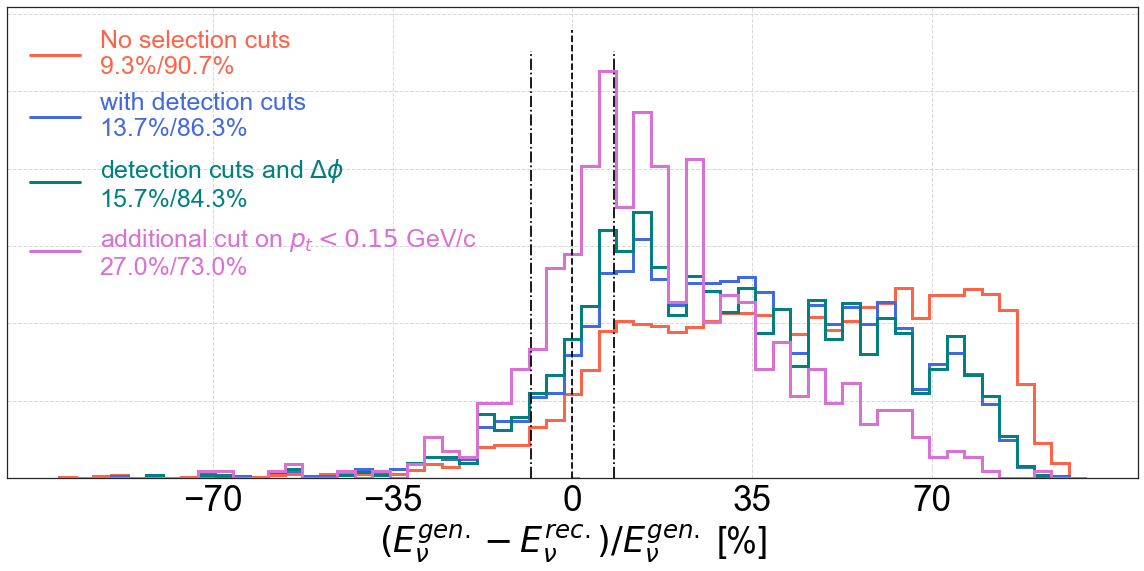

In [16]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
        
    sample['reco_Emu'] = np.sqrt( np.square(m_mu) + np.square(sample['reco_Pmu']) )
    numerator =  2*M_n_star*sample['reco_Emu'] - ( np.square(M_n_star) + np.square(m_mu) - np.square(M_p) )
    denominator = 2*( M_n_star - sample['reco_Emu'] + sample['reco_Pmu']*np.cos(sample['reco_Pmu_theta']))
    sample['reco_Ev_from_mu'] = numerator/denominator

    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev_from_mu'])/sample['closest_genie_Ev']
    fgood = find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage )
    
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label+'\n'+'%.1f'%(100.*fgood)+'%'+'/%.1f'%(100.*(1-fgood))+'%',linewidth=3)

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)

plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper left')
for text,color in zip(leg.get_texts(),cut_colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed_from_muon.pdf')